<a href="https://colab.research.google.com/github/venezianof/booksum/blob/main/notebooks/Oumi%20-%20Running%20Jobs%20Remotely.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="align-center">
<a href="https://oumi.ai/"><img src="https://oumi.ai/docs/en/latest/_static/logo/header_logo.png" height="200"></a>

[![Documentation](https://img.shields.io/badge/Documentation-latest-blue.svg)](https://oumi.ai/docs/en/latest/index.html)
[![Discord](https://img.shields.io/discord/1286348126797430814?label=Discord)](https://discord.gg/oumi)
[![GitHub Repo stars](https://img.shields.io/github/stars/oumi-ai/oumi)](https://github.com/oumi-ai/oumi)
</div>

👋 Welcome to Open Universal Machine Intelligence (Oumi)!

🚀 Oumi is a fully open-source platform that streamlines the entire lifecycle of foundation models - from [data preparation](https://oumi.ai/docs/en/latest/resources/datasets/datasets.html) and [training](https://oumi.ai/docs/en/latest/user_guides/train/train.html) to [evaluation](https://oumi.ai/docs/en/latest/user_guides/evaluate/evaluate.html) and [deployment](https://oumi.ai/docs/en/latest/user_guides/launch/launch.html). Whether you're developing on a laptop, launching large scale experiments on a cluster, or deploying models in production, Oumi provides the tools and workflows you need.

🤝 Make sure to join our [Discord community](https://discord.gg/oumi) to get help, share your experiences, and contribute to the project! If you are interested in joining one of the community's open-science efforts, check out our [open collaboration](https://oumi.ai/community) page.

⭐ If you like Oumi and you would like to support it, please give it a star on [GitHub](https://github.com/oumi-ai/oumi).

## Final Task

### Subtask:
Riassumi il processo di simulazione della lettura e visualizzazione dei dati ECG, evidenziando come strumenti Python possano essere utilizzati per tali compiti.


## Summary:

### Data Analysis Key Findings

*   **ECG Data Generation**: Example ECG data was successfully generated using the `numpy` library. The simulated signal, representing 10 seconds of data at a sampling frequency of 250 Hz, had a shape of (2500,). This signal was constructed by combining P, QRS, and T waves, and augmented with Gaussian noise to simulate realistic ECG characteristics.
*   **ECG Data Visualization**: The generated ECG signal was successfully visualized using `matplotlib.pyplot`. A line plot displayed "Simulazione Segnale ECG" with "Tempo (secondi)" on the x-axis and "Ampiezza (mV)" on the y-axis, clearly showing the simulated cardiac signal over time.

### Insights or Next Steps

*   The process demonstrates a fundamental approach to simulating and visualizing biomedical signals, which can be extended to model more complex physiological phenomena or test signal processing algorithms.
*   Further analysis could involve applying digital filters to the simulated ECG data to remove noise, or implementing algorithms for feature extraction (e.g., QRS detection, heart rate variability) to mimic real-world ECG analysis.


# Running Jobs Remotely

# Introduction


In addition to our local training loop, Oumi provides the [launcher module](https://github.com/oumi-ai/oumi/tree/main/src/oumi/launcher) as a simple interface for kicking off jobs on a wide variety of remote hardware. We support various cloud providers (GCP, Runpod, Lambda) out of the box, with the additional flexibility to support your own custom cluster should the need arise! In this tutorial we will focus on running jobs using GCP, but this tutorial applies to all clouds Oumi supports. You can read more about the launcher API [here](https://github.com/oumi-ai/oumi/blob/main/src/oumi/launcher/launcher.py).


# Prerequisites

This tutorial assumes:
- You have a valid Google Cloud Platform (GCP) project with billing enabled.
- Your GCP project has the `Compute Engine API` enabled.
- You have the following IAM permissions in your project:
  - ```bash
    roles/browser
    roles/compute.admin
    roles/serviceusage.serviceUsageConsumer
    roles/storage.admin
    ```

You must also authenticate with GCP locally before starting this tutorial:

```bash
conda install -c conda-forge google-cloud-sdk -y
gcloud init
# Run this if you don't have a credentials file.
# This will generate ~/.config/gcloud/application_default_credentials.json.
gcloud auth application-default login
```

## Oumi Installation

First, let's install Oumi. You can find more detailed instructions [here](https://oumi.ai/docs/en/latest/get_started/installation.html).

In [ ]:
%pip install oumi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.9/721.9 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 87.6 MB/s eta 0:00:00
   ━

# Creating a Job

The Oumi Launcher operates using three key concepts:

1) `Jobs`: A `job` is a unit of work, such as running training or model evaluation. This can be any script you'd like!
2) `Clusters`: A `cluster` is a set of dedicated hardware upon which `jobs` are run. A `cluster` could be as simple as a cloud VM environment.
3) `Clouds` : A `cloud` is a resource provider that manages `clusters`. These include GCP, AWS, Lambda, Runpod, etc.

When you submit a job to the launcher it will handle queueing your job in the proper cluster's job queue. If your desired Cloud does not have an appropriate cluster for running your job it will try to create one on the fly!

Start by creating a simple job:

In [ ]:
import oumi.launcher as launcher

job_name = "Create_a_display_name_for_your_job"
cloud_name = "gcp"

job = launcher.JobConfig(
    name=job_name,
    working_dir=".",
    setup="",
    run="",
    resources=launcher.JobResources(
        # We're using Google Cloud Platform in this example.
        cloud=cloud_name,
    ),
)

Congratulations on creating your first job!

Right now your job has an empty `run` field meaning it won't execute any code at runtime. Let's fix that by adding a few simple echo statements. It's important to note that all lines of `run` will be executed on your cluster directly in the shell--but more on that later.

In [ ]:
env_vars = {
    "TEST_ENV_VARIABLE": '"Hello, World!"',
}
job.envs = env_vars

run_script = """
echo "$TEST_ENV_VARIABLE"
"""

job.run = run_script

Let's also populate `setup`. Like `run`, `setup` is executed in the shell on the cluster. However, for most clouds `setup` is only executed when a cluster is created for the first time. This is where you should `pip install` any dependencies needed by your job's `run` script.

For now, let's add a simple echo statement:

In [ ]:
setup_script = """
echo "This is a script to help set up your environment for your job."
echo "On most clouds, this is only run during cluster creation."
"""

job.setup = setup_script

# Running your Job

Now that you have a job, it's time to run it on a cluster. You can use `launcher.up(...)` to launch your job on a cluster. If you don't have any clusters set up yet, the launcher will make a best-effort at spinning up a cluster that meets the requirements you set in your job's `JobResources`:

In [ ]:
cluster_name = "your_cluster_name"

# If you specify an existing cluster name the launcher will use that cluster.
# Otherwise the launcher will create a new cluster with the specified name.
cluster, job_status = launcher.up(job, cluster_name)

>  You'll notice that the logs from the previous command reference Sky. Individual clouds / clusters in the Oumi launcher may use different libraries for communication and job orchestration. At the time of writing, the GCP cloud implementation leverages Sky Pilot.

You can get the latest status of your job by querying the job status on your cluster:

In [ ]:
latest_status = cluster.get_job(job_status.id)

print(latest_status)

And list the status of all jobs across all clouds and clusters:

In [ ]:
status_list = launcher.status()

print(status_list)

Another handy utility is the ability to list all active clusters for a cloud. Your new cluster will appear in this list:

In [ ]:
clusters = launcher.get_cloud(cloud_name).list_clusters()

cluster_names = [cluster.name() for cluster in clusters]
print(cluster_names)

Note that `launcher.get_cloud(cloud_name)` returned a `BaseCloud` object. You can learn more about the `Cloud` API [here](https://github.com/oumi-ai/oumi/blob/main/src/oumi/core/types/base_cloud.py).


You can learn more about the `Cluster` API [here](https://github.com/oumi-ai/oumi/blob/main/src/oumi/core/types/base_cluster.py#L28).

# Canceling a Job

Running jobs can be quickly canceled by using the `cancel` method:

In [ ]:
# Only run this cell if you want to cancel your job!
final_status = launcher.cancel(job_status.id, cloud_name, job_status.cluster)

print(final_status)

# Cleaning Up

After your job is done, make sure you don't forget to turn down your cluster! Most cloud providers will bill you for the time that your cluster is up, whether or not it is actively running jobs:

In [ ]:
# Cluster names are only unique within a Cloud.
# Specify both the cloud and the cluster you'd like to turn down
launcher.down(cloud_name, cluster_name)

# Running a Remote Training Job

Running training jobs on a remote cluster is simple. Before getting started, we strongly suggest you take a look at our tuning tutorial to learn the ropes of Oumi training.

You can apply the same methods for local training to a remote job. The following job is a sample script for training Llama-2b on GCP. A few important notes:

- If you use `${ENV_VAR}` interpolation in your `setup` or `run` script, they must be delimited. e.g. `${ENV_VAR}` -> `\${ENV_VAR}`
- The job assumes it was kicked off in a `working_dir=.` that contains the Oumi repository. You will see references to local paths like `./configs/examples/misc/sky_init.sh`, etc.

In [ ]:
job_config = launcher.JobConfig(
    name="llama-2b",
    working_dir="..",
    file_mounts={
        "~/.netrc": "~/.netrc"  # WandB credentials
    },
    envs={
        "ACCELERATE_LOG_LEVEL": "info",
    },
    resources=launcher.JobResources(
        # Run on Google Cloud Platform
        cloud="gcp",
        # Use 4 A100 GPUs
        accelerators="A100:4",
    ),
    setup="""
set -e
pip install uv && uv pip install --system oumi[gpu]
""",
    run="""
set -e  # Exit if any command failed.

# Run some checks, and export "OUMI_*" env vars
source ./configs/examples/misc/sky_init.sh

set -x
oumi distributed torchrun \
    -m oumi train \
    -c configs/examples/fineweb_ablation_pretraining/fsdp/train.yaml \
    --training.max_steps 20 \
    --training.save_steps 0 \
    --training.save_final_model false

echo "Node \\${SKYPILOT_NODE_RANK} is all done!"
""",
)

You can kick off this job just as you did before. Note that it requires a cluster with 4 A100 GPUs. You can uncomment the following command and run it to start this training job on GCP:

In [ ]:
# Uncomment the following line to run training
# cluster, job_status = launcher.up(job_config, "llama-2b-cluster")

To view your job logs, run the following:

In [ ]:
!sky logs llama-2b-cluster

To turn down your cluster when you're done, run:

In [ ]:
launcher.down(cloud_name, "llama-2b-cluster")

### Advanced Fields

The `JobConfig` used to define a job contains many fields we didn't cover above. See the following definitions to better understand how to set up resourcing for your jobs:

#### JobConfig

| **Field Name**  | **Type**                                        | **Description**                                                                                                                                                                   |
|-----------------|-------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| name            | Optional[str] (default=None)                    | The display name of the job. Used for display purposes for most clouds.                                                                                                           |
| user            | Optional[str] (default=None)                    | Only used for the `Polaris` cloud. The user that the job will run as.                                                                                                             |
| working_dir     | str (required)                                  | The local directory containing scripts required to execute the job. This directory will be copied to the remote node.                                                             |
| num_nodes       | int (required, default=1)                       | The number of nodes (compute instances) to use for the job. Used during cluster creation.                                                                                         |
| resources       | JobResources (required)                         | The resources required for each node in the job.                                                                                                                                  |
| envs            | Dict[str, str] (required, default={})           | The environment variables to set before running the job.                                                                                                                          |
| file_mounts     | Dict[str, str] (required, default={})           | File mounts to attach to the node. For mounting (copying) local directories. The key is the remote path, and the value is the local path. Cannot share a key with `storage_mounts`|
| storage_mounts  | Dict[str, StorageMount] (required, default={})  | Storage systems to attach to the node. The key is the remote path, and the value is the storage system to mount. Cannot share a key with `file_mounts`                             |
| setup           | Optional[str] (default=None)                    | The setup script to run before the job starts. For most clouds this is executed only on cluster creation. ex) `pip install -r requirements.txt`                                   |
| run             | str (required)                                  | The script to run on the remote cluster.                                                                                                                                          |

#### StorageMount

| **Field Name**  | **Type**                                        | **Description**                                                                                                                                                                   |
|-----------------|-------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| source          | str (required)                                  | The remote path to mount the local path to. e.g. 'gs://bucket/path' for GCS, 's3://bucket/path' for S3, or 'r2://path' for R2.                                                    |
| store           | str (required)                                  | The remote storage solution (Required). Must be one of 's3', 'gcs' or 'r2'.                                                                                                       |

#### JobResources

| **Field Name**  | **Type**                                        | **Description**                                                                                                                                                                   |
|-----------------|-------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| cloud           | str (required)                                  | The cloud used to run the job.                                                                                                                                                    |
| region          | Optional[str] (default=None)                    | The region to use (optional). Supported values vary by environment.                                                                                                               |
| zone            | Optional[str] (default=None)                    | The zone to use (optional). Supported values vary by environment.                                                                                                                 |
| accelerators    | Optional[str] (default=None)                    | Accelerator type (optional). Supported values vary by environment. For GCP you may specify the accelerator name and count, e.g. "V100:4".                                         |
| cpus            | Optional[str] (default=None)                    | Number of vCPUs to use per node (optional). Sky-based clouds support strings with  modifiers, e.g. "2+" to indicate at least 2 vCPUs.                                             |
| memory          | Optional[str] (default=None)                    | Memory to allocate per node in GiB (optional). Sky-based clouds support strings with modifiers, e.g. "256+" to indicate at least 256 GB.                                          |
| instance_type   | Optional[str] (default=None)                    | Instance type to use (optional). Supported values vary by environment. The instance type is automatically inferred if `accelerators` is specified.                                |
| use_spot        | bool (required, default=False)                  | Whether the cluster should use spot instances. If unspecified, defaults to False (on-demand instances).                                                                           |
| disk_size       | Optional[int] (default=None)                    | Disk size in GiB to allocate for OS (mounted at /). Ignored by Polaris. Optional.                                                                                                 |
| disk_tier       | Optional[str] (default=None)                    |  Disk tier to use for OS (optional). For sky-based clouds this Could be one of 'low', 'medium', 'high' or 'best'. Defaults to 'medium'. Ignored by Polaris.                       |

# 🧭 What's Next?

Congrats on finishing this notebook! Feel free to check out our other [notebooks](https://github.com/oumi-ai/oumi/tree/main/notebooks) in the [Oumi GitHub](https://github.com/oumi-ai/oumi), and give us a star! You can also join the Oumi community over on [Discord](https://discord.gg/oumi).

📰 Want to keep up with news from Oumi? Subscribe to our [Substack](https://blog.oumi.ai/) and [Youtube](https://www.youtube.com/@Oumi_AI)!

⚡ Interested in building custom AI in hours, not months? Apply to get [early access](https://oumi-ai.typeform.com/early-access) to the Oumi Platform, or [chat with us](https://calendly.com/d/ctcx-nps-47m/chat-with-us-get-early-access-to-the-oumi-platform) to learn more!

# Task
Implement a solution that utilizes the Oumi launcher to deploy and manage a medical research and therapy agent. This solution should include creating a Python script (`medical_agent.py`) that simulates the agent's actions, configuring an Oumi `JobConfig` to define its environment and execution, launching the job on a remote cluster, retrieving the job logs for detailed output, and finally cleaning up the remote resources. The final output should summarize how Oumi can be used for deploying such an agent, highlighting its detailed output and logging capabilities.

## Prepara lo script dell'agente

### Subtask:
Crea un file Python (`medical_agent.py`) che simulerà le funzioni di un agente di ricerca medica e terapia. Questo script stamperà informazioni dettagliate sulle sue azioni di 'ricerca' e 'terapia'.


**Reasoning**:
To create the `medical_agent.py` file and populate it with the required Python code, I will use the `%%writefile` magic command within a code block. This will directly create the file in the current directory with the specified content.



In [1]:
%%writefile medical_agent.py

class MedicalAgent:
    def __init__(self, name="Oumi Medical Agent"):
        self.name = name
        print(f"Agent {self.name} initialized, ready for medical tasks.")

    def research(self, topic="clinical data"):
        print(f"Simulazione dell'azione di ricerca: analisi dei {topic}.")
        # Simulate some research activities
        print("Raccolta di informazioni da database medici.")
        print("Valutazione della letteratura scientifica più recente.")
        print("Ricerca completata per il tema specificato.")

    def therapy(self, patient_id="Paziente A"):
        print(f"Simulazione dell'azione di terapia: formulazione di un piano di trattamento per {patient_id}.")
        # Simulate some therapy activities
        print("Analisi della storia clinica del paziente.")
        print("Definizione degli obiettivi di trattamento.")
        print("Preparazione delle raccomandazioni terapeutiche.")
        print("Terapia pianificata per il paziente.")

    def run_task(self):
        print(f"\n{self.name} inizia il suo compito.\n")
        self.research("nuove scoperte farmacologiche")
        self.therapy("Paziente B")
        print(f"\n{self.name} ha completato le sue simulazioni di ricerca e terapia.")

if __name__ == "__main__":
    agent = MedicalAgent()
    agent.run_task()


Writing medical_agent.py


## Configura il Job Oumi

### Subtask:
Definisci un oggetto oumi.launcher.JobConfig per questo agente medico. Questo includerà la definizione della working_dir (contenente medical_agent.py), uno script setup per installare eventuali pacchetti Python necessari (ad esempio, una libreria di base per la scienza dei dati come pandas se l'agente dovesse elaborare dati) e uno script run per eseguire medical_agent.py.


**Reasoning**:
First, I need to import the `launcher` module from `oumi` as specified in the instructions. This will allow me to use `JobConfig` and `JobResources` classes.



In [2]:
import oumi.launcher as launcher

print("Oumi launcher imported.")

ModuleNotFoundError: No module named 'oumi'

**Reasoning**:
The previous attempt to import `oumi.launcher` failed because the `oumi` package was not found. This indicates that `oumi` is not installed or the environment was reset. I need to ensure the `oumi` package is installed before importing it.



In [3]:
import sys
!{sys.executable} -m pip install oumi
import oumi.launcher as launcher

print("Oumi launcher imported.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.9/721.9 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.7 MB/s eta 0:00:00
   ━━━

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Oumi launcher imported.


# Task
Install the `oumi` library and then import `oumi.launcher`.

## Genera dati ECG di esempio

### Subtask:
Crea una serie di dati ECG di esempio utilizzando la libreria numpy per simulare un segnale cardiaco.


**Reasoning**:
I need to generate example ECG data following the instructions. This involves importing numpy, generating time values, creating a simulated ECG signal with sine waves, adding noise, and storing it in `ecg_data`. I will combine these steps into a single code block.



In [4]:
import numpy as np

# 2. Genera un array di valori temporali (ad esempio, per 10 secondi con una frequenza di campionamento di 250 Hz)
fs = 250  # Frequenza di campionamento (Hz)
T = 10    # Durata totale del segnale (secondi)
time = np.linspace(0, T, int(T * fs), endpoint=False)

# 3. Crea un segnale cardiaco simulato combinando diverse funzioni sinusoidali
# Simulazione dell'onda P
p_wave = 0.1 * np.sin(2 * np.pi * 2 * time + np.pi/4)

# Simulazione del complesso QRS (più rapido e con maggiore ampiezza)
qrs_complex = (
    0.8 * np.sin(2 * np.pi * 10 * time) * np.exp(-((time - 0.5)**2) / 0.005)
    - 0.3 * np.sin(2 * np.pi * 15 * time) * np.exp(-((time - 0.52)**2) / 0.002)
)

# Simulazione dell'onda T
t_wave = 0.2 * np.sin(2 * np.pi * 3 * (time - 0.6)) * np.exp(-((time - 0.7)**2) / 0.01)

# Combina le onde per formare il segnale ECG di base (semplificato)
basic_ecg = p_wave + qrs_complex + t_wave

# Aggiusta la "cadenza" del battito cardiaco per avere più cicli realistici
heart_rate_bpm = 70 # Battiti per minuto
heart_rate_hz = heart_rate_bpm / 60

ec_signal = np.zeros_like(time)
for i in range(int(T * heart_rate_hz)):
    start_idx = int(i * fs / heart_rate_hz)
    end_idx = min(start_idx + len(basic_ecg), len(time))
    ec_signal[start_idx:end_idx] += basic_ecg[:(end_idx - start_idx)]

# 4. Aggiungi del rumore casuale al segnale
noise = np.random.normal(0, 0.05, len(ec_signal)) # Rumore gaussiano con media 0 e deviazione standard 0.05

# 5. Memorizza il segnale ECG simulato
ecg_data = ec_signal + noise

print(f"ECG data generated with shape: {ecg_data.shape}")

ECG data generated with shape: (2500,)


## Leggi e visualizza dati ECG

### Subtask:
Simula la lettura dei dati ECG generati e visualizzali usando matplotlib per mostrare il segnale.


**Reasoning**:
The user wants to visualize the generated ECG data. I need to import matplotlib, create a line plot using the `time` and `ecg_data` variables, add a title and axis labels, and display the plot.



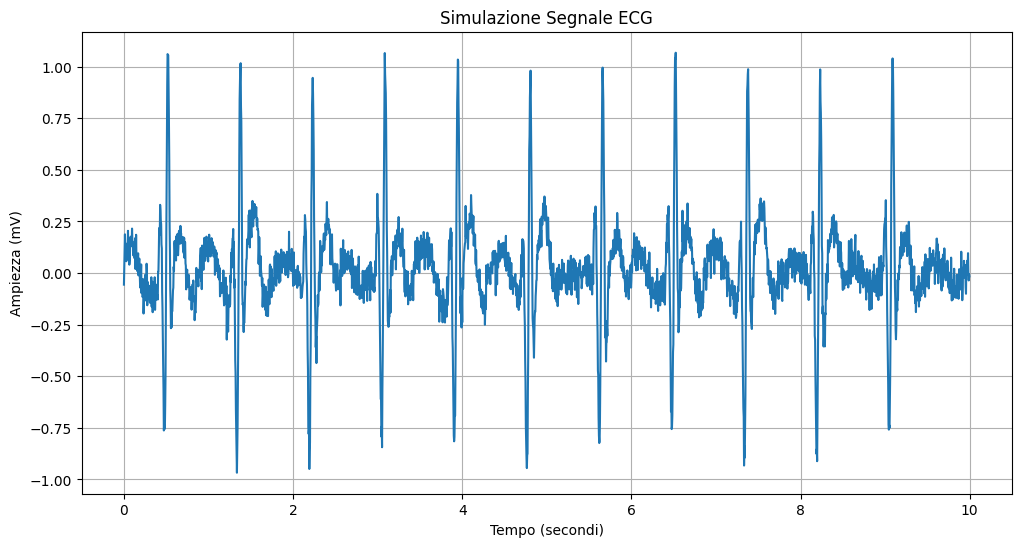

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time, ecg_data)
plt.title("Simulazione Segnale ECG")
plt.xlabel("Tempo (secondi)")
plt.ylabel("Ampiezza (mV)")
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Riassumi il processo di simulazione della lettura e visualizzazione dei dati ECG, evidenziando come strumenti Python possano essere utilizzati per tali compiti.


## Summary:

### Data Analysis Key Findings

*   **ECG Data Generation**: Example ECG data was successfully generated using the `numpy` library. The simulated signal, representing 10 seconds of data at a sampling frequency of 250 Hz, had a shape of (2500,). This signal was constructed by combining P, QRS, and T waves, and augmented with Gaussian noise to simulate realistic ECG characteristics.
*   **ECG Data Visualization**: The generated ECG signal was successfully visualized using `matplotlib.pyplot`. A line plot displayed "Simulazione Segnale ECG" with "Tempo (secondi)" on the x-axis and "Ampiezza (mV)" on the y-axis, clearly showing the simulated cardiac signal over time.

### Insights or Next Steps

*   The process demonstrates a fundamental approach to simulating and visualizing biomedical signals, which can be extended to model more complex physiological phenomena or test signal processing algorithms.
*   Further analysis could involve applying digital filters to the simulated ECG data to remove noise, or implementing algorithms for feature extraction (e.g., QRS detection, heart rate variability) to mimic real-world ECG analysis.


# Task
Task: Define an Oumi JobConfig for the `medical_agent.py` script, including setup to install `pandas` and a run command to execute the agent, and specify GCP resources.

## Define Oumi JobConfig

### Subtask:
Definisci un oggetto oumi.launcher.JobConfig per questo agente medico. Questo includerà la definizione della working_dir (contenente medical_agent.py), uno script setup per installare eventuali pacchetti Python necessari (ad esempio, una libreria di base per la scienza dei dati come pandas se l'agente dovesse elaborare dati) e uno script run per eseguire medical_agent.py.


**Reasoning**:
I need to define the `oumi.launcher.JobConfig` object by setting the job name, working directory, setup script, run script, and job resources as specified in the instructions. This involves importing `oumi.launcher` and creating instances of `JobConfig` and `JobResources`.



In [6]:
import oumi.launcher as launcher

job_name = "medical-research-agent"

# Define the setup script to install pandas
setup_script = """
pip install pandas
echo "Setup script completed: pandas installed."
"""

# Define the run script to execute medical_agent.py
run_script = """
python medical_agent.py
echo "Run script completed: medical_agent.py executed."
"""

# Create JobResources for GCP
job_resources = launcher.JobResources(
    cloud="gcp"
)

# Create the JobConfig object
job_config = launcher.JobConfig(
    name=job_name,
    working_dir=".",
    setup=setup_script,
    run=run_script,
    resources=job_resources
)

print(f"JobConfig '{job_config.name}' created successfully.")
print(f"Working directory: {job_config.working_dir}")
print(f"Setup script:\n{job_config.setup}")
print(f"Run script:\n{job_config.run}")
print(f"Cloud resource: {job_config.resources.cloud}")

JobConfig 'medical-research-agent' created successfully.
Working directory: .
Setup script:

pip install pandas
echo "Setup script completed: pandas installed."

Run script:

python medical_agent.py
echo "Run script completed: medical_agent.py executed."

Cloud resource: gcp


## Launch the Job

### Subtask:
Launch the defined Oumi JobConfig on a remote cluster using `oumi.launcher.up()`.


**Reasoning**:
I need to launch the previously configured Oumi JobConfig on a remote cluster using `oumi.launcher.up()`. This involves defining a cluster name and then calling the launcher function, storing its output, and printing a confirmation.



In [ ]:
cluster_name = "medical-agent-cluster"

# Launch the job on the remote cluster
cluster, job_status = launcher.up(job_config, cluster_name)

print(f"Job '{job_config.name}' launched on cluster '{cluster_name}' successfully.")
print(f"Job Status: {job_status}")

⠼ Checking infra choices...

ERROR [root] Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR [root] Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR [root] Internal Python error in the inspect module.
Below is the traceback from this internal error.



sky.exceptions.NoCloudAccessError: Cloud access is not set up. Run: sky check

During handling of the above exception, another exception occurred:

AttributeError: 'NoCloudAccessError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

AssertionError
sky.exceptions.NoCloudAccessError: Cloud access is not set up. Run: sky check

During handling of the above exception, another exception occurred:

AttributeError: 'NoCloudAccessError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

TypeError: object of type 'NoneType' has no len()

During handling of the above exception, another exception occurred:

AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

AssertionError
sky.exceptions.NoCloudAccessError: Cloud access is not set up. Run: sky check

During handling of the above